<a href="https://colab.research.google.com/github/hsnbnaa/deep-learning-is-easy/blob/main/Hands-on%20Machine%20Learning%20with%20Scikit-Learn%2C%20Keras%20%26%20TensorFlow/Chapter%2015/15_processing_sequences_using_rnns_and_cnns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Contoh data dummy (time series sederhana)
# Misal: memprediksi nilai berikutnya dari sinyal sinus
def generate_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  # Gelombang sinus 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20))  # Gelombang sinus 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)    # Noise
    return series[..., np.newaxis].astype(np.float32)

n_steps = 50
X = generate_series(10000, n_steps + 1)
X_train, y_train = X[:7000, :n_steps], X[:7000, -1]
X_valid, y_valid = X[7000:9000, :n_steps], X[7000:9000, -1]


In [3]:
# Model RNN
model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1])  # 1 output neuron
])

# Kompilasi model
optimizer = keras.optimizers.Adam(learning_rate=0.005)
model.compile(loss="mse", optimizer=optimizer)

# Latih model
history = model.fit(
    X_train, y_train,
    epochs=5,
    validation_data=(X_valid, y_valid)
)

# Evaluasi
mse = model.evaluate(X_valid, y_valid)
print(f"Validation MSE: {mse:.4f}")

Epoch 1/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.3176 - val_loss: 0.1822
Epoch 2/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1480 - val_loss: 0.0808
Epoch 3/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0638 - val_loss: 0.0290
Epoch 4/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0238 - val_loss: 0.0137
Epoch 5/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0129 - val_loss: 0.0112
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0115
Validation MSE: 0.0112


In [ ]:
# Contoh model dengan lapisan LSTM
model = keras.models.Sequential([
    keras.layers.LSTM(32, return_sequences=True, input_shape=[None, 1]),
    keras.layers.LSTM(32),
    keras.layers.Dense(1) # Output untuk prediksi 1 nilai
])

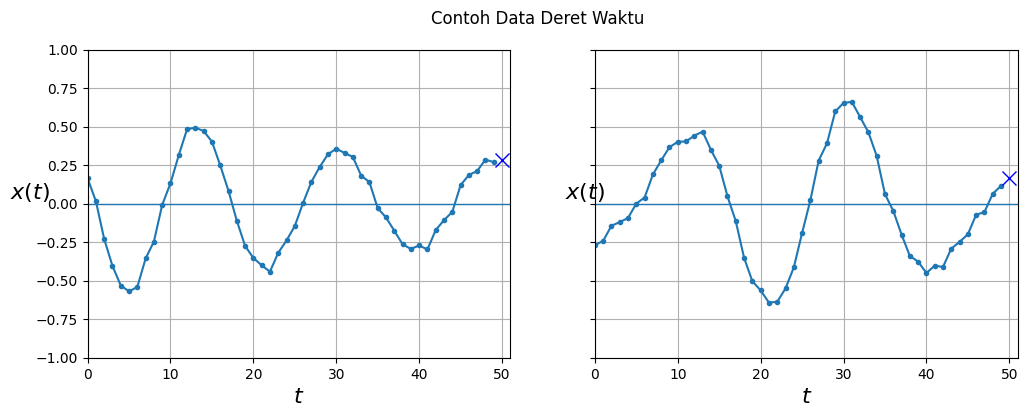

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# Fungsi untuk membuat data deret waktu
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  #   gelombang 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + gelombang 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)   # + noise
    return series[..., np.newaxis].astype(np.float32)

# Membuat data
n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

# Plotting satu contoh deret waktu
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bx", markersize=10)
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "ro")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])

fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12, 4))
plt.sca(axes[0])
plot_series(X_valid[0, :, 0], y_valid[0, 0])
plt.sca(axes[1])
plot_series(X_valid[1, :, 0], y_valid[1, 0])
plt.suptitle("Contoh Data Deret Waktu")
plt.show()

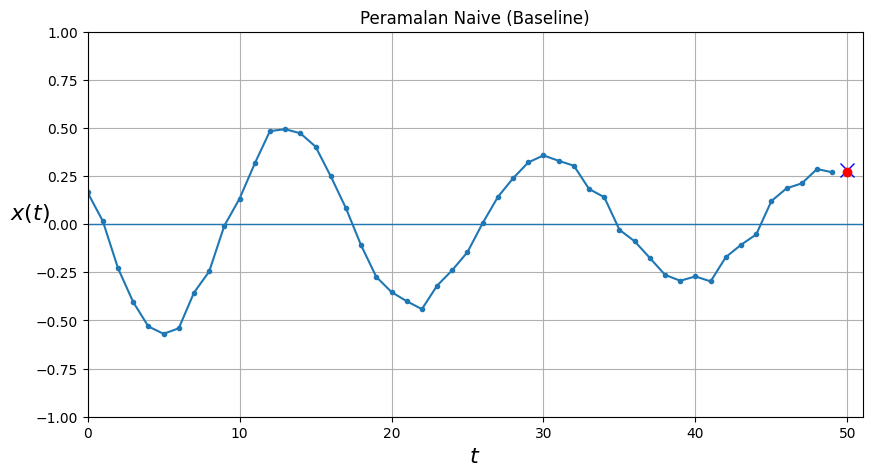

In [5]:
# Naive forecast: memprediksi nilai terakhir dari deret waktu
y_pred = X_valid[:, -1]

# Plotting hasil naive forecast
plt.figure(figsize=(10, 5))
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.title("Peramalan Naive (Baseline)")
plt.show()

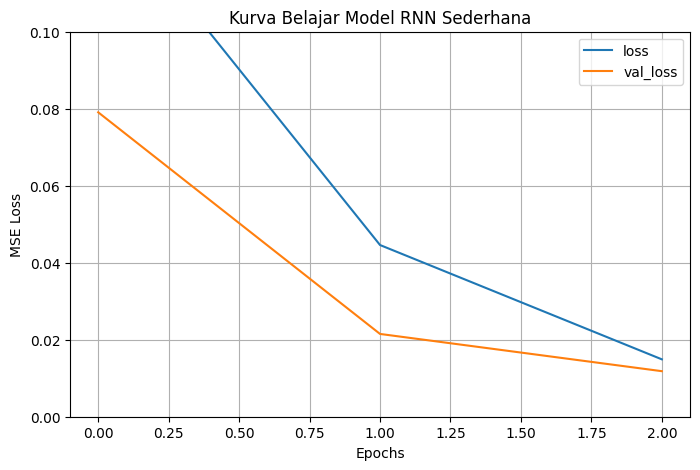

In [7]:
# Membuat dan melatih model RNN sederhana
np.random.seed(42)
tf.random.set_seed(42)

model_rnn = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1])
])

optimizer = keras.optimizers.Adam(learning_rate=0.005)
model_rnn.compile(loss="mse", optimizer=optimizer)
history = model_rnn.fit(X_train, y_train, epochs=3,
                      validation_data=(X_valid, y_valid), verbose=0)

# Plotting kurva belajar
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 0.1)
plt.title("Kurva Belajar Model RNN Sederhana")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.show()